In [2]:
%pip install ucimlrepo
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score,classification_report, confusion_matrix, RocCurveDisplay,ConfusionMatrixDisplay 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import OneHotEncoder


In [4]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# General layout

In [5]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [6]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Head and tail didn't provide different values of income so I tried random indcies
y[50:60]

,income
50,<=50K
51,<=50K
52,>50K
53,>50K
54,<=50K
55,>50K
56,<=50K
57,<=50K
58,<=50K
59,<=50K


In [8]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


In [9]:
df = X.copy(deep=True)
df['income'] = y.copy(deep=True)

# Data Cleaning

## NULL values

In [10]:
(df.isnull()).sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
# NULL values
for i in df.columns:
    print(f"{i}: {len(df.loc[df[i] == '?',i])}", end='\n')

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 583
income: 0


In [12]:
df.replace('?', np.nan, inplace=True)

In [13]:
for i in df.columns:
    print(f"{i}: {len(df.loc[df[i] == '?',i])}", end='\n')

age: 0
workclass: 0
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 0
income: 0


In [14]:
(df.isnull()).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

I've decided to drop these values for now<br>
Considering our domain it's hard to try to get the country of someone which is null or his working class using 
common techniques like imputing or bfill or ffill 

In [15]:
# Drop rows with missing values
df.dropna(axis = 0,inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [16]:
(df.isnull()).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [17]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [18]:
df.loc[df['income'] == '>50K.', 'income' ] = '>50K'
df.loc[df['income'] == '<=50K.', 'income'] = '<=50K'
# copy for graphing
Y = df['income'].copy(deep=True)
df.loc[df['income'] == '>50K',  'income' ] = 1
df.loc[df['income'] == '<=50K',  'income'] = 0
df['income'] = df['income'] .astype('int64')

## Checking for duplicates

In [19]:
print(sum(df.duplicated()))
df.drop_duplicates(inplace=True)
print(sum(df.duplicated()))

47
0


In [20]:
df.reset_index(inplace=True,drop=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
45171,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
45172,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
45173,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [21]:
df.to_csv("adult.csv")

In [22]:
X = df.drop(columns=['income'],inplace=False)
y = df['income']

# Plotting

In [23]:
sns.set_style("whitegrid")

<Axes: xlabel='income', ylabel='income'>

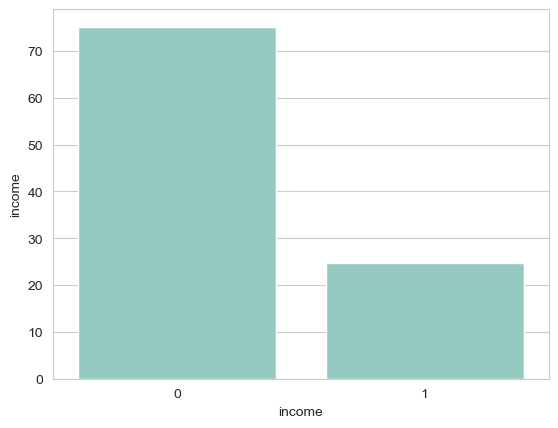

In [24]:
sns.barplot(x='income', y='income', data=df,estimator=lambda x: (len(x)/len(y)*100))

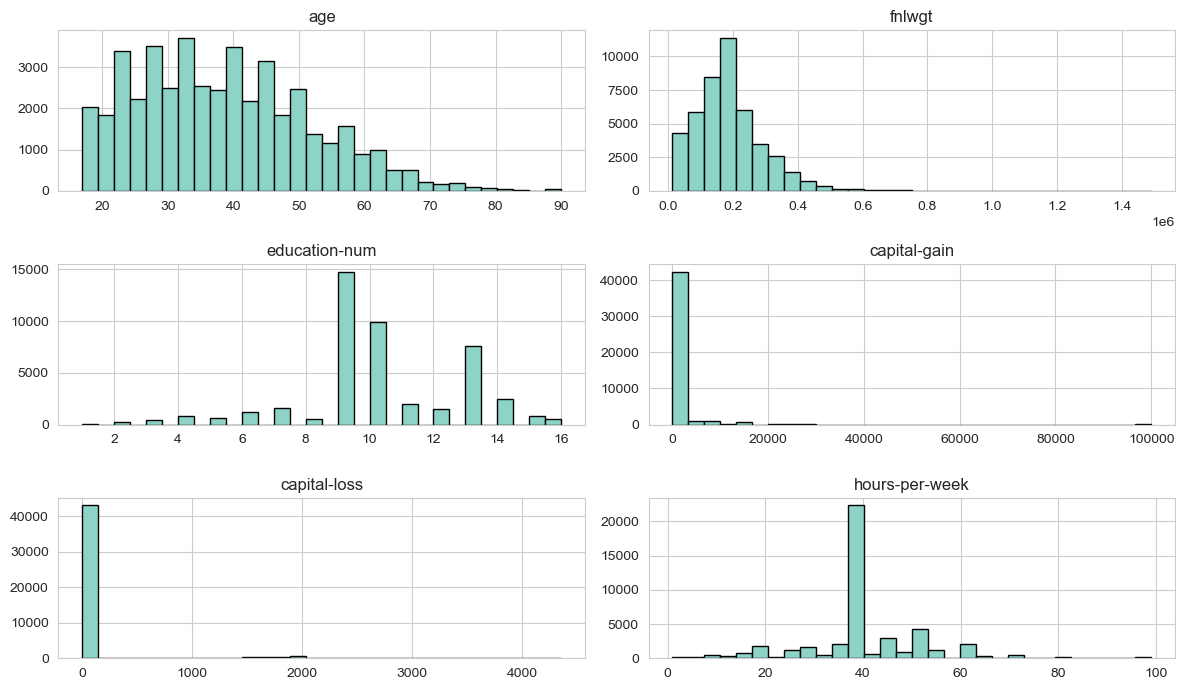

In [25]:
X.hist(figsize=(12,7),bins=30,edgecolor ='black')
plt.tight_layout()
plt.show()

In [26]:
df_copy = df.copy(deep=True)
df_copy['income'] = Y

In [27]:
# Extracting catgorical columns
categorical_col = X.select_dtypes(include=['object']).columns.to_list()
categorical_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [28]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if(x < 31 ):
        return "<=30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_copy['age_group'] = df_copy['age'].apply(age_group)

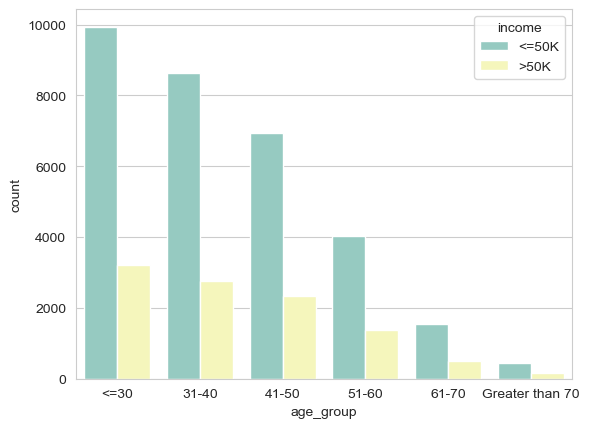

In [29]:
sns.countplot(data = df_copy, x = 'age_group', hue= 'income',order=['<=30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70'])
plt.show()


In [30]:
counts = df_copy['native-country'].value_counts()
mask = df_copy['native-country'].map(counts) < 130
df_copy.loc[mask, 'native-country'] = 'other'

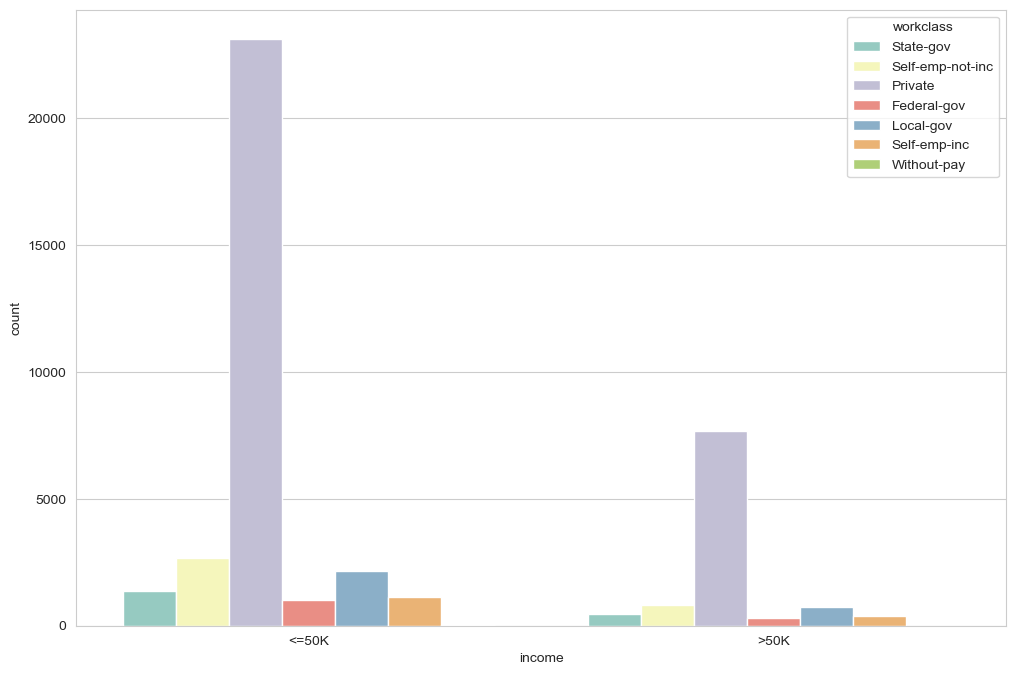

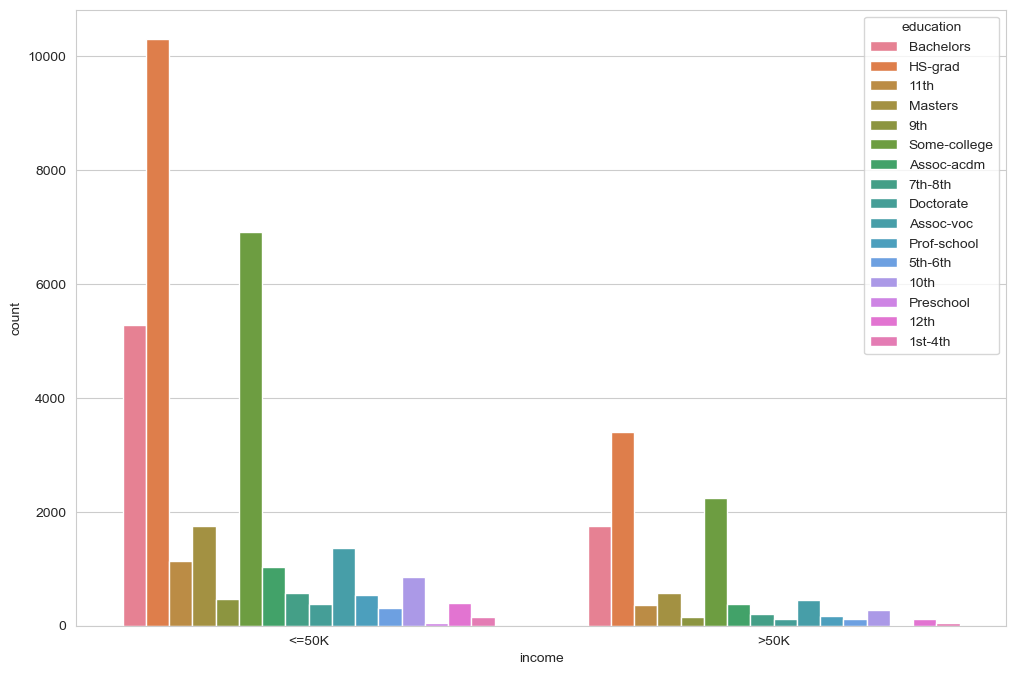

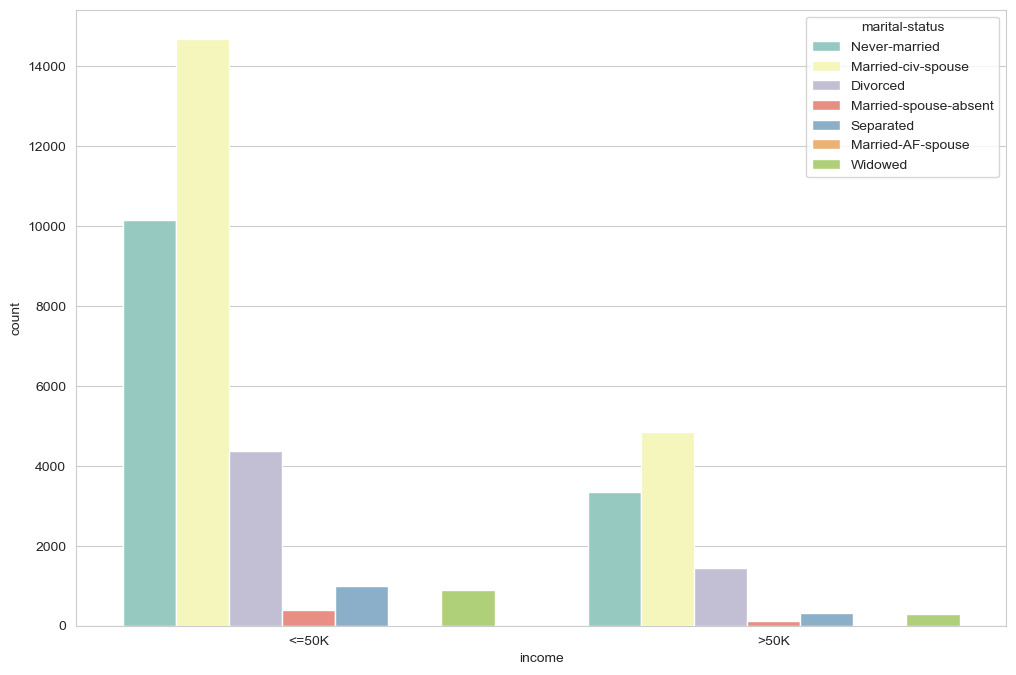

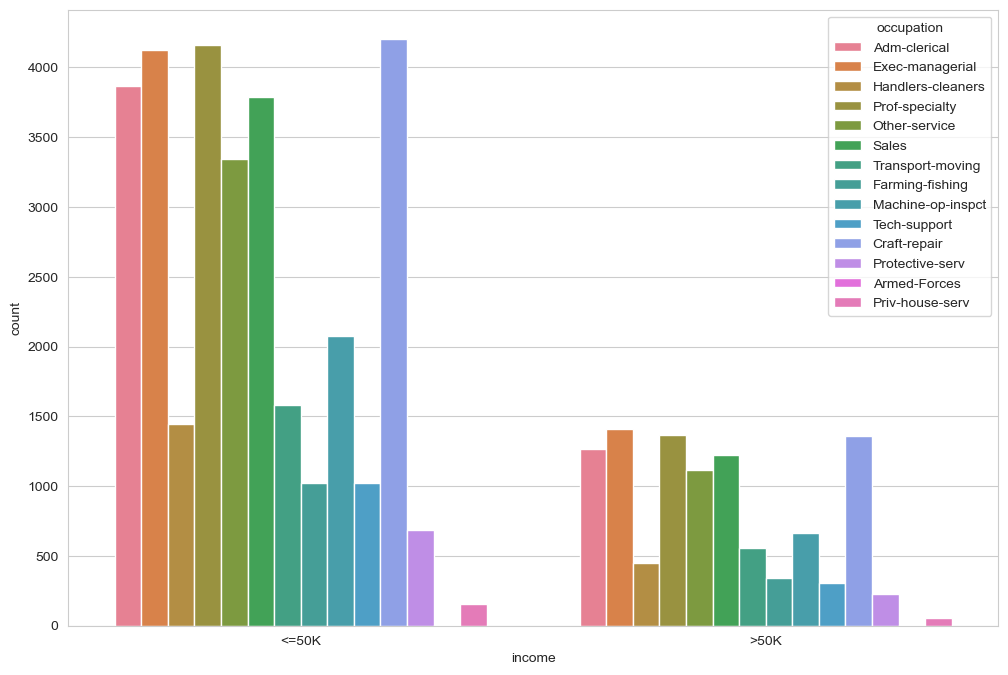

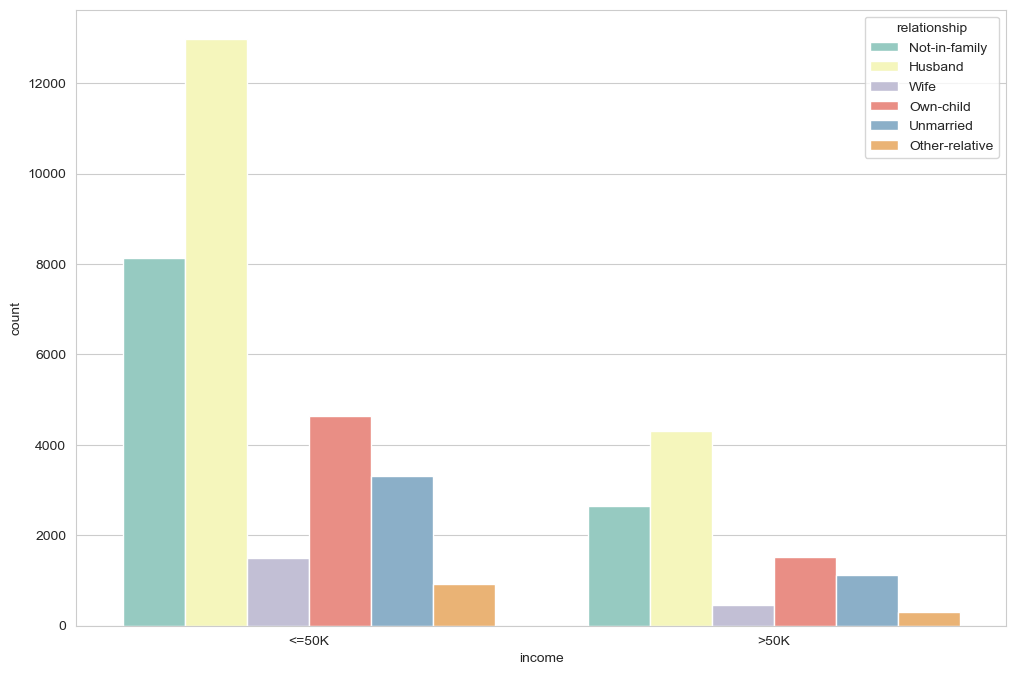

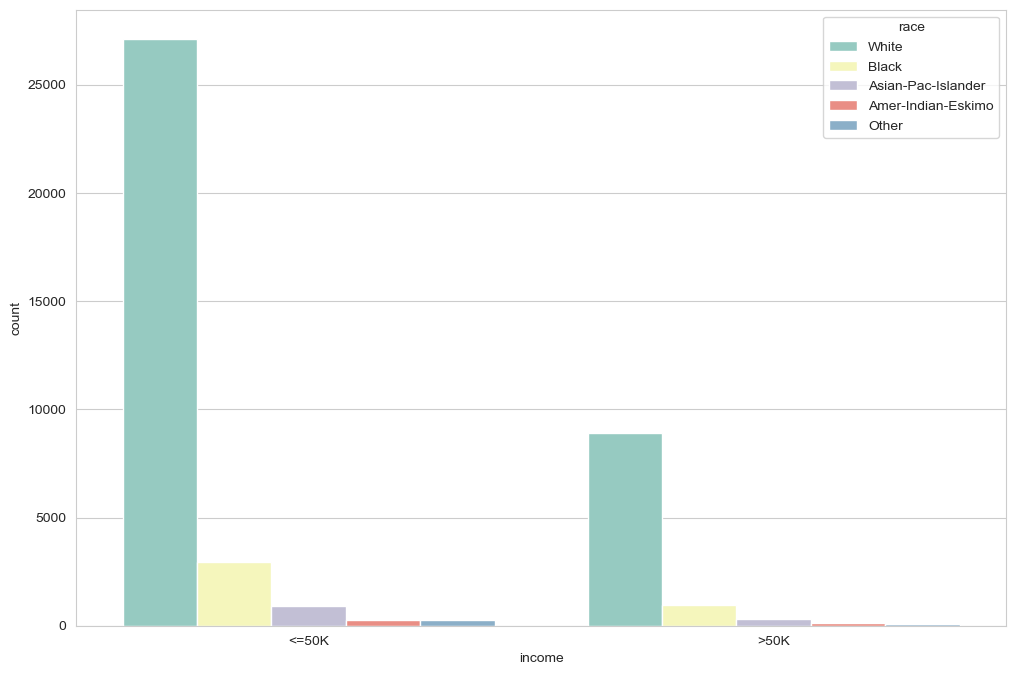

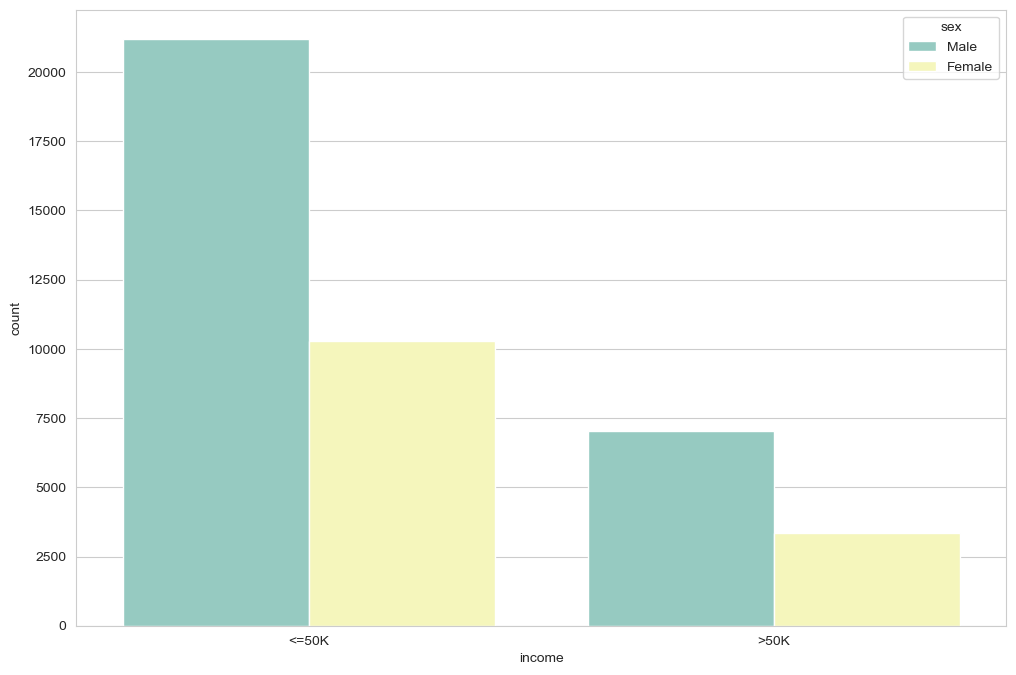

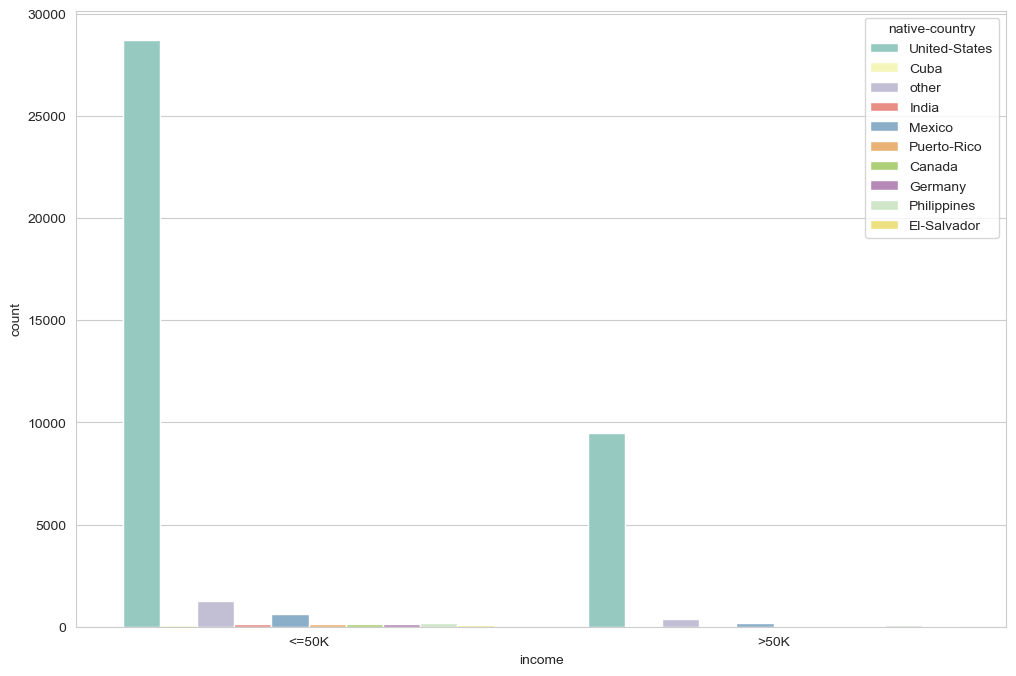

In [31]:
for i in categorical_col:
    plt.figure(figsize=(12,8))
    sns.countplot(data = df_copy, x = 'income', hue= f'{i}')
    plt.show()

# Model training

## One hot encoding

In [32]:
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(X[categorical_col])

one_hot_X = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_col))

# Concatenate the one-hot encoded dataframe with the original dataframe
X = pd.concat([X, one_hot_X], axis=1)

# Drop the original categorical columns
X = X.drop(categorical_col, axis=1)

In [33]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,33,245211,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45171,39,215419,13,0,0,36,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45172,38,374983,13,0,0,50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45173,44,83891,13,5455,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Test-train split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1,shuffle=True)


In [35]:
N_FOLDS = 5

## KNN

In [36]:
X.dtypes

age                                 int64
fnlwgt                              int64
education-num                       int64
capital-gain                        int64
capital-loss                        int64
                                   ...   
native-country_Thailand           float64
native-country_Trinadad&Tobago    float64
native-country_United-States      float64
native-country_Vietnam            float64
native-country_Yugoslavia         float64
Length: 104, dtype: object

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Model have a converganse problem so I will scale the data and use max_iter variable
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


params = {
    'C': [0.001, 0.01, 0.1, 1, 5,10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cholesky', 'sag', 'saga']
}
Logistic_reg_model = LogisticRegression(random_state=1)
log_cv = GridSearchCV(Logistic_reg_model, param_grid=params, cv=N_FOLDS, scoring="f1",n_jobs=5)
log_cv.fit(X=X_train_scaled, y=y_train)
best_model_log = log_cv.best_estimator_
y_pred_log_reg = best_model_log.predict(X_test_scaled)
print(f"Optimal hyperparameters:{log_cv.best_params_}")
print(f"Logistic Regression F1_score:{log_cv.best_score_}")


Optimal hyperparameters:{'C': 1, 'penalty': 'l2', 'solver': 'sag'}
Logistic Regression F1_score:0.6618459221873794


c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [39]:
print(f'{f1_score(y_pred_log_reg,y_test):0.2f}')

0.67


In [40]:
# neighbors = [3, 5, 7, 9, 11, 21, 31, 41]
# weights = ["uniform", 'distance']
# params = {"n_neighbors": neighbors, "weights":weights}

# KNN = KNeighborsClassifier(n_neighbors=5)
# # gs_KNN = GridSearchCV(KNN,param_grid=params,cv=N_FOLDS, scoring="f1")
# gs_KNN = KNN
# gs_KNN.fit(X=X_train,y=y_train)
# # best_model = gs_KNN.best_estimator_
# y_pred_KNN = gs_KNN.predict(X_test)

In [ ]:
# print(f'{f1_score(y_pred_KNN,y_test):0.2f}')

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X=X_train, y=y_train)
y_pred_gnb = gnb.predict(X_test)
print(f1_score(y_pred_gnb,y_test))



0.41562881562881565


In [48]:
print(f"precision:\n{precision_score(y_test,y_pred_gnb):0.2f}")
print(f"\nrecall:\n{recall_score(y_test,y_pred_gnb):0.2f}")
print(f"\nf1_score:\n{f1_score(y_test,y_pred_gnb):0.2f}")

precision:
0.66

recall:
0.30

f1_score:
0.42


In [43]:
from sklearn.tree import DecisionTreeClassifier

params = { "criterion":["gini", "entropy"],
    "max_depth": range(1,10,1),
    "min_samples_split":range(2,10,1),
    "max_leaf_nodes":range(2,10,1)
}
DT = GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid=params,cv=N_FOLDS, scoring="f1",n_jobs=5)
DT.fit(X=X_train,y=y_train)
best_model = DT.best_estimator_
y_pred_DT = best_model.predict(X_test)


In [44]:
print(f"precision:\n{precision_score(y_test,y_pred_DT):0.2f}")
print(f"\nrecall:\n{recall_score(y_test,y_pred_DT):0.2f}")
print(f"\nf1_score:\n{f1_score(y_test,y_pred_DT):0.2f}")

precision:
0.75

recall:
0.57

f1_score:
0.65


In [45]:
from sklearn.ensemble import RandomForestClassifier

params = { "criterion":["gini", "entropy"],
    "max_depth": range(1,10,1),
    "min_samples_split":range(2,10,1),
    "max_leaf_nodes":range(2,10,1),
    "max_features":['sqrt','log2']
}


rf = GridSearchCV(RandomForestClassifier(random_state=1),param_grid=params,cv=N_FOLDS, scoring="f1",n_jobs=6)
rf.fit(X=X_train,y=y_train)
best_model = rf.best_estimator_
y_pred_rf = best_model.predict(X_test)


In [46]:
print(f"precision:\n{precision_score(y_test,y_pred_rf):0.2f}")
print(f"\nrecall:\n{recall_score(y_test,y_pred_rf):0.2f}")
print(f"\nf1_score:\n{f1_score(y_test,y_pred_rf):0.2f}")

precision:
0.80

recall:
0.42

f1_score:
0.55


In [47]:
print(f"Optimal hyperparameters:{rf.best_params_}")


Optimal hyperparameters:{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_split': 9}


uptill now the best model is logisitic regression for our data

In [49]:
# SVM code with the scaled data
params_svm = {
    # I tuned C through multipile elimnations
    'C': range(80,100,5),
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'gamma': ['scale', 'auto'],
    "degree":range(0,10,1)

}

y_svm_train = y_train.copy(deep=True)
y_svm_test = y_test.copy(deep=True)


SVM works better if the target variable is [1,-1]

These models took alot of time and computations to train them, so, in the rest of the analysis I will just call them if I need them


In [ ]:
import joblib

joblib.dump(rf.best_estimator_, 'ٌRandom forest.pkl')
joblib.dump(best_model_log, 'Logistic regression.pkl')
joblib.dump(gnb, 'gnb.pkl')
joblib.dump(DT.best_estimator_, 'Decision tree.pkl')


In [50]:
y_svm_train[y_svm_train == 0] = -1
y_svm_test[y_svm_test == 0] = -1

In [51]:
SVM = GridSearchCV(SVC(random_state=1, probability=True), param_grid=params_svm, cv=N_FOLDS, scoring='f1',n_jobs=5)
SVM.fit(X=X_train_scaled, y=y_svm_train)
best_model_svm = SVM.best_estimator_
y_pred_svm = best_model_svm.predict(X_test_scaled)

In [ ]:
print(f"\nf1_score:\n{f1_score(y_svm_test,y_pred_svm):0.2f}")
print(f"Optimal hyperparameters:{SVM.best_params_}")


In [ ]:
joblib.dump(SVM.best_estimator_, 'SVM.pkl')
